In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


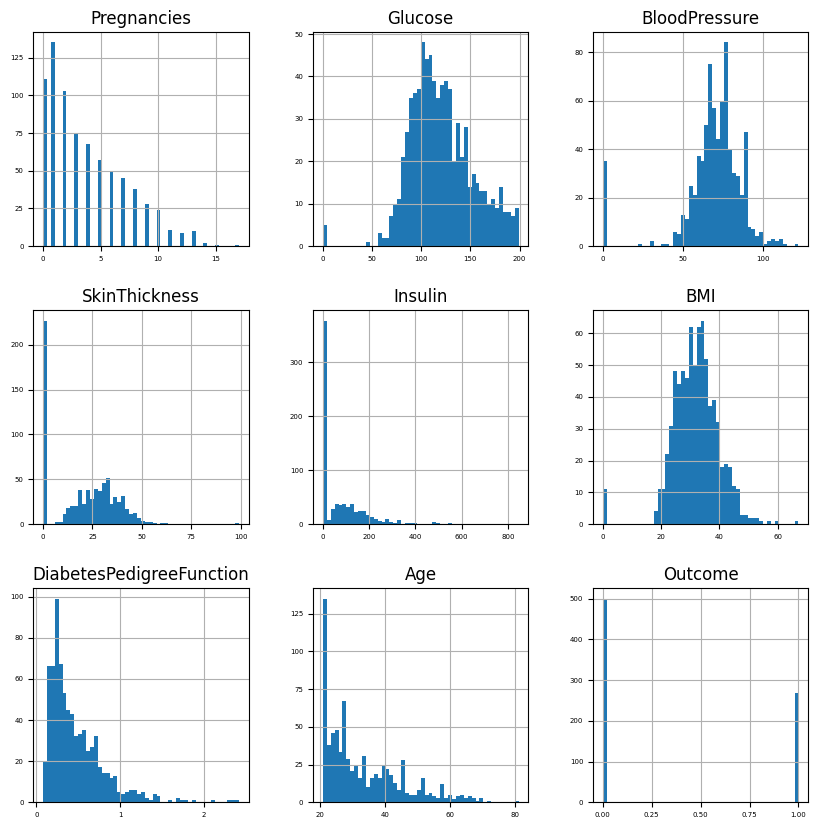

In [9]:
df.hist(figsize=(10, 10), bins=50, xlabelsize=5, ylabelsize=5);

# Logistic Regression

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [11]:
X = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [13]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = "liblinear")
log_model = log.fit(X_train,y_train)
log_model

LogisticRegression(solver='liblinear')

In [14]:
y_pred = log_model.predict(X_test)

In [15]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [16]:
accuracy_score(y_test, log_model.predict(X_test))


0.7532467532467533

# Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model


GaussianNB()

In [18]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.7445887445887446

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model



KNeighborsClassifier()

In [20]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)



0.6883116883116883

In [21]:
knn_params = {"n_neighbors": np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [22]:
print("Best KNN score:" + str(knn_cv.best_score_))
print("Best KNN parameter: " + str(knn_cv.best_params_))

Best KNN score:0.748637316561845
Best KNN parameter: {'n_neighbors': 11}


In [23]:
knn = KNeighborsClassifier(1)
knn_tuned = knn.fit(X_train, y_train)

In [24]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6883116883116883

# SVM - Support Vector Model

In [25]:
from sklearn.svm import SVC


svm_model = SVC(kernel = "linear").fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)



0.7445887445887446

In [27]:
svc_params = {"C": np.arange(1,5)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params,  cv = 10,  n_jobs = -1, verbose = 2 )
svc_cv_model.fit(X_train, y_train)


Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4])}, verbose=2)

In [28]:
print("Best Params: " + str(svc_cv_model.best_params_))

Best Params: {'C': 1}


In [29]:
svc_tuned = SVC(kernel = "linear", C = 2).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [30]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



# Random Forests

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [33]:
rf_tuned = RandomForestClassifier(max_depth = 8,
                                  max_features = 8,
                                  min_samples_split = 2,
                                  n_estimators = 1000)

In [34]:
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [35]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       151
           1       0.62      0.69      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231

